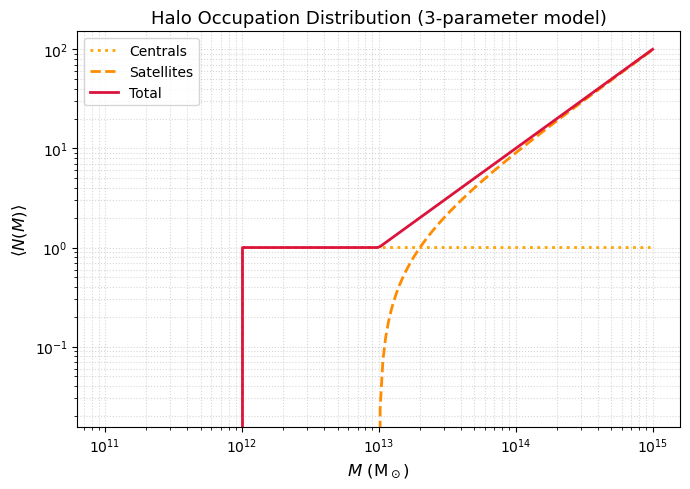

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define mass range
M = np.logspace(11, 15, 200)

# HOD parameters
M_min = 1e12
M_1 = 1e13
alpha = 1.0

# HOD components
N_cen = np.where(M >= M_min, 1, 0)
N_sat = np.where(M >= M_1, ((M - M_1) / M_1) ** alpha, 0)
N_total = N_cen + N_sat

# Plot and save
plt.figure(figsize=(7, 5))
plt.loglog(M, N_cen, linestyle=':', label='Centrals', linewidth=2, color='orange')
plt.loglog(M, N_sat, linestyle='--', label='Satellites', linewidth=2, color='darkorange')
plt.loglog(M, N_total, linestyle='-', label='Total', linewidth=2, color='crimson')

plt.xlabel(r'$M\ (\mathrm{M}_\odot)$', fontsize=12)
plt.ylabel(r'$\langle N(M) \rangle$', fontsize=12)
plt.title('Halo Occupation Distribution (3-parameter model)', fontsize=13)
plt.legend()
plt.grid(True, which='both', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.savefig("HOD_3param_model.png", dpi=300)
plt.show()
